# Project 3

- **Dataset(s) to be used:** https://dataverse.ada.edu.au/dataset.xhtml?persistentId=doi:10.26193/A9VEXA
- **Analysis question:** The 2025 Australian Election saw a significant swing away from the Coalition and towards the pro-climate Labor Party and a number of independant climate-focused MPs called the 'Teal' candidates. In trying to understand this historic outcome, one explanation has been that the Coalition simply did not have a robust climate agenda and lost the 'young' Australian voter. However, this is complexified by the fact that many of the Teal candidates won seats in electorates tht are typically older in their demographic makeup. This project will investigate the question of how important age is as a factor in understanding the climate views of the Australian electorate.
- **Columns that will (likely) be used:**
  - H2_AGE_GRP1. Age group derived from year of birth.
  - J4. Which social class would you say you belong to?
  - J6. What is the gross annual income, before tax or other deductions, for you and your family living with you from all sources? Please include any pensions and allowances, and income from interest or dividends.
  - D1_15: When you were deciding about how to vote, how important was each of these issues to you personally? Climate change
  - D3_1: Still thinking about the same 10 issues, which of these issues was the most important to you and your family during the election campaign?[The ten issues are: Taxation, Immigration, Education, The environment, Health and Medicare, Refugees and asylum seekers, Global warming, Management of the economy, The COVID-19 pandemic, The cost of living, National security, Housing affordability, Climate change]
  - D3_2: Which was the second most important [of the ten issues above] issue to you and your family?
- **Hypothesis**: That while age is a significant determinant of pro-climate views, economic class also plays a significant role in understanding Australian voters' views on the climate. 

### About the Data:

The Australian Election Study (AES) is the leading study of political attitudes and behaviour in Australia. The study has surveyed voters every 2-3 years from 1987 to 2025. This project will only use the 2025 survey data. 

An accompanying 'Data Dictionary' file can also be downloaded which provides meta data information. The analysis and labelling below will draw on the information in the Data Dictionary. 

The Data Dictionary can be found here: https://dataverse.ada.edu.au/file.xhtml?fileId=20593&version=2.0

In [2]:
import pandas as pd
import plotly.express as px
from IPython.display import HTML

In [3]:
#Read in the raw data and adjust for mixed value types
raw_data = pd.read_csv("AECdata.csv", encoding='ISO-8859-1')

/var/folders/tc/1r2409r932s5h7qv_y8v4xf00000gn/T/ipykernel_18049/1861782409.py:2: DtypeWarning: Columns (263,287) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("AECdata.csv", encoding='ISO-8859-1')


### 1. Inspect and Clean the Data

In [4]:
raw_data.info()

raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Columns: 328 entries, Unnamed: 0 to weight
dtypes: float64(35), int64(269), object(24)
memory usage: 5.2+ MB


,Unnamed: 0,ID,ID_2022,ID_2019,ID_2016,IntDate,Mode,STATE,PCODE_r,SAMPSRC,...,doutcome,devicetype,devicedets,GCCSA,SA2_r,LGA_r,CED_ABS,CED_AEC,weight_final,weight
0,1,22050036,NaN,NaN,NaN,22-Jul-25,2,1,9,4,...,1,1.0,1.0,1,9,9,128,NaN,12196.747520,1.369738
1,2,22050046,NaN,NaN,NaN,22-Jul-25,2,3,9,4,...,1,1.0,1.0,5,9,9,304,377.0,16274.478560,1.827681
2,3,22050052,NaN,NaN,NaN,23-Jul-25,2,2,9,4,...,1,0.0,8.0,3,9,9,211,434.0,3623.536035,0.406936
3,4,22050065,NaN,NaN,NaN,22-Jul-25,2,2,9,4,...,1,0.0,12.0,4,9,9,210,418.0,48505.249370,5.447310
4,5,22050084,NaN,NaN,NaN,22-Jul-25,2,1,9,4,...,1,1.0,6.0,1,9,9,120,385.0,33951.905360,3.812918
5,6,22050098,NaN,NaN,NaN,23-Jul-25,2,1,9,4,...,1,1.0,1.0,1,9,9,112,392.0,4962.180915,0.557270
6,7,22050100,NaN,NaN,NaN,22-Jul-25,2,5,9,4,...,1,0.0,12.0,9,9,9,515,426.0,14531.192440,1.631904
7,8,22050137,NaN,NaN,NaN,23-Jul-25,2,2,9,4,...,1,1.0,6.0,3,9,9,218,421.0,8408.695260,0.944326
8,9,22050157,NaN,NaN,NaN,22-Jul-25,2,5,9,4,...,1,1.0,1.0,9,9,9,504,350.0,4612.663665,0.518018
9,10,22050163,NaN,NaN,NaN,23-Jul-25,2,2,9,4,...,1,1.0,6.0,3,9,9,223,409.0,3623.536035,0.406936


The data set has 2070 rows for each surveyed individual and 328 columns which includes identifier, demographic and survey response information. We can already see from the above that there are some NaN values which is good to keep in mind for data cleaning. 

Given we are focused on age, we should check how many respondents are in each age group as this may impact the analysis. 

In [5]:
#Get count of each age group 
age_summary = raw_data.groupby('H2_AGE_GRP2').size()
print("Age group counts:")
print(age_summary)

Age group counts:
H2_AGE_GRP2
1      168
2      227
3      236
4      255
5      340
6      429
7      360
999     55
dtype: int64


We have not yet relabelled each of the age group values but we know from the Data Dictionary that 1 = 18-24 and 7 = 75+. We can see from the above that there is a skew towards a higher number of survey respondents in the older age groups. This is good to keep in mind for thinking about the robustness of any preliminary conclusions that we draw. 

Next, we can create a new dataframe that selects the columns we want to work with for this analysis and rename the column headings, using the Data Dictionary. 

In [6]:
#Create new dataframe with delected columns
select_data = raw_data[['H2_AGE_GRP2','J4','J6', 'D1_15','D3_1','D3_2']]

select_data.head()


,H2_AGE_GRP2,J4,J6,D1_15,D3_1,D3_2
0,2,2,7,1,4,3.0
1,2,999,999,2,999,NaN
2,2,2,24,3,2,1.0
3,2,3,11,3,12,14.0
4,2,4,21,2,12,3.0


In [7]:
#Create dictionary for renaming columns
column_rename_dict = {
    'H2_AGE_GRP2': 'Age Category',
    'J4': 'Perceived Social Class',
    'J6': 'Income Category',
    'D1_15': 'Importance of Climate Change',
    'D3_1': 'Most Important Election Issue',
    'D3_2': 'Second Most Important Election Issue',}

#Apply the renaming
select_data = select_data.rename(columns=column_rename_dict)

select_data.head()

,Age Category,Perceived Social Class,Income Category,Importance of Climate Change,Most Important Election Issue,Second Most Important Election Issue
0,2,2,7,1,4,3.0
1,2,999,999,2,999,NaN
2,2,2,24,3,2,1.0
3,2,3,11,3,12,14.0
4,2,4,21,2,12,3.0


### 2. Investigate Age and Importance of Climate Change 

Let's start with the question which asks respondents how important climate change is when they were deciding how to vote. Options were Extremely important (1), Quite important (2) or Not very important (3). We want to understand whether young voters are more inclined to respond (1) relative to older voters

To do this, we can create a pivot table and then a bar chart.

But first, we should take a closer look at what needs to be cleaned up in our two columns.

In [8]:
#Check what values we have in these two columns 
print("Values in Age Category:")
print(select_data['Age Category'].value_counts().sort_index())

print("Values in Importance of Climate Change:")
print(select_data['Importance of Climate Change'].value_counts().sort_index())

Values in Age Category:
Age Category
1      168
2      227
3      236
4      255
5      340
6      429
7      360
999     55
Name: count, dtype: int64
Values in Importance of Climate Change:
Importance of Climate Change
1      867
2      709
3      470
999     24
Name: count, dtype: int64


Create a new data frame for our two columns of interest and remove the rows that have 999 in either column. Note: from the Data Dictionary we know that 999 means no response. 

In [9]:
#Create new data frame 
climateimport_data = select_data[['Age Category', 'Importance of Climate Change']]

#Filter out rows with 999 in either column
climateimport_data = climateimport_data[
    ~climateimport_data['Importance of Climate Change'].isin([999]) & 
    ~climateimport_data['Age Category'].isin([999])]

#Check that rows with 999 values have been removed
print("Value counts for Importance of Climate Change:")
print(climateimport_data['Importance of Climate Change'].value_counts().sort_index())

print("Value counts for Age Category:")
print(climateimport_data['Age Category'].value_counts().sort_index())


Value counts for Importance of Climate Change:
Importance of Climate Change
1    844
2    698
3    454
Name: count, dtype: int64
Value counts for Age Category:
Age Category
1    166
2    223
3    233
4    253
5    340
6    428
7    353
Name: count, dtype: int64


Now that we have a clean dataframe we can generate a pivot table with meaningful labelling as well. 

In [10]:
#Create pivot table which counts values in each age and importance category
climateimport_pivot = pd.pivot_table(
    climateimport_data,
    index='Age Category',
    columns='Importance of Climate Change',
    aggfunc='size',
    fill_value=0)

#Rename columns to correspond with survey options
importance_labels = {
    1: 'Extremely Important',
    2: 'Quite Important',
    3: 'Not Very Important'}

climateimport_pivot = climateimport_pivot.rename(columns=importance_labels)

#Rename rows to correspond with age survey age brackets
age_labels = {
    1: '18 to 24',
    2: '25 to 34',
    3: '35 to 44',
    4: '45 to 54',
    5: '55 to 64',
    6: '65 to 74',
    7: '75 and over'}

climateimport_pivot = climateimport_pivot.rename(index=age_labels)

climateimport_pivot.head(7)


Importance of Climate Change,Extremely Important,Quite Important,Not Very Important
Age Category,,,
18 to 24,78,67,21
25 to 34,83,100,40
35 to 44,109,80,44
45 to 54,111,87,55
55 to 64,132,114,94
65 to 74,181,132,115
75 and over,150,118,85


The pivot table above shows us our raw data from each of the age groups for this question. Interestingly, we can see that on a raw-number basis, there are more people in the older groups that deem climate change 'Extremely' or 'Quite' important. However, in order to great a more accurate picture, we should convert these raw numbers to percentages, particularly given our quick look at the skew of number of respondents in each age group above.  

In [11]:
#Convert each row to percentage
climateimport_percent_pivot = climateimport_pivot.div(climateimport_pivot.sum(axis=1), axis=0) * 100

#Round to 1 decimal place
climateimport_percent_pivot = climateimport_percent_pivot.round(1)  # Fixed variable name

climateimport_percent_pivot.head(7)

Importance of Climate Change,Extremely Important,Quite Important,Not Very Important
Age Category,,,
18 to 24,47.0,40.4,12.7
25 to 34,37.2,44.8,17.9
35 to 44,46.8,34.3,18.9
45 to 54,43.9,34.4,21.7
55 to 64,38.8,33.5,27.6
65 to 74,42.3,30.8,26.9
75 and over,42.5,33.4,24.1


In [12]:
#Calcualte mean for reference
importance_means = climateimport_percent_pivot.mean(axis=0) 

print(importance_means)

Importance of Climate Change
Extremely Important    42.642857
Quite Important        35.942857
Not Very Important     21.400000
dtype: float64


We can see from the above percentage table that looking at the raw data table would have indeed been misleading. We can convert this pivot table into a bar chart for a clear visual.

In [13]:
#Reset index to make Age Category a column
climateimport_plot = climateimport_percent_pivot.reset_index()
climateimport_plot = climateimport_plot.rename(columns={'index': 'Age Category'})

#Melt the data from wide to long format so that it can be interpreted by Plotly
climateimport_melt = pd.melt(
  climateimport_plot,
    id_vars=['Age Category'],
    value_vars=['Extremely Important', 'Quite Important', 'Not Very Important'],
    var_name='Importance Level',
    value_name='Percentage (%)'
)

#Create the bar chart
climateimport_fig = px.bar(
    climateimport_melt,
    x='Importance Level',         
    y='Percentage (%)',               
    color='Age Category',           
    barmode='group',                
    title='Climate Change Importance by Age Group',
    text_auto='.1f')

HTML(climateimport_fig.to_html(include_plotlyjs="cdn", full_html=False))

Already this chart provides some interesting results. While the youngest group of voters, the 18-24 year olds have the highest percentage of respondents with 'Extremely Important' views of climate, the next age group, the 25-34 year olds, have the lowest percentage. However, the 25-34 year olds have the highest percentage of respondents with 'Quite Important' views of climate. Perhaps what we are seeing here, therefore, is an overall concern for climate from the two youngest voters, but with some moderation in views with age. As per our hypothesis, older voters do in general have the highest percentage of respondents with 'Not Very Important' views. 

### 2. Investigate Age and Climate Change Driving Voting Behaviour

Our hypothesis questions whether class also matters for voting behaviour on climate as this could potentially explain the success of pro-climate parties in electorates with older age demographics. Overall, it does seem from the above that younger voters care more, but the picture is somewhat mixed particularly when thinking about the 25-34 age group.

The above analysis tells us about how respondents feel about the importance of climate generally in their voting. However, we can use the two questions (D3_1, D3_2) that specifically ask whether climate was the most or second most important election issue among other issues to get a sense of how climate is weighed against other issues and its bearing on actual voting desisions. 

We can create another bar chart like the above that looks at whether climate was the most or second most important election issue to a respondent. To do this, let's create a new column in a new data frame that filters on whether climate was selected as a response to either of the questions above. 


In [14]:
#Create new column that filters on climate as a response (climate = 15) to either question
select_data['Election Issue'] = ((select_data['Most Important Election Issue'] == 15) | 
                                 (select_data['Second Most Important Election Issue'] == 15)).astype(int)

select_data.head(10) 

,Age Category,Perceived Social Class,Income Category,Importance of Climate Change,Most Important Election Issue,Second Most Important Election Issue,Election Issue
0,2,2,7,1,4,3.0,0
1,2,999,999,2,999,NaN,0
2,2,2,24,3,2,1.0,0
3,2,3,11,3,12,14.0,0
4,2,4,21,2,12,3.0,0
5,2,2,25,2,12,14.0,0
6,2,4,17,3,2,6.0,0
7,2,2,24,1,12,6.0,0
8,2,2,25,1,12,15.0,1
9,2,2,13,2,10,13.0,0


Let's clean up the data like we did above and create a pivot table with percentages.

In [15]:
#Select columns and remove 999 rows
votingimport_data = select_data[
    (select_data['Age Category'] != 999) & 
    (select_data['Election Issue'] != 999)]

#Create a pivot table
votingimport_pivot = pd.pivot_table(
    votingimport_data,
    index='Age Category',
    columns='Election Issue',
    aggfunc='size',
    fill_value=0)

#Rename columns
Topissue_labels = {
    1: 'Top Election Issue',
    0: 'Not a Top Election Issue'}

votingimport_pivot = votingimport_pivot.rename(columns=Topissue_labels)

#Rename rows
age_labels = {
    1: '18 to 24',
    2: '25 to 34',
    3: '35 to 44',
    4: '45 to 54',
    5: '55 to 64',
    6: '65 to 74',
    7: '75 and over'}

votingimport_pivot = votingimport_pivot.rename(index=age_labels)

votingimport_pivot.head(7)


Election Issue,Not a Top Election Issue,Top Election Issue
Age Category,,
18 to 24,154,14
25 to 34,199,28
35 to 44,201,35
45 to 54,218,37
55 to 64,295,45
65 to 74,353,76
75 and over,305,55


In [16]:
#Convert to percentage 
votingimport_percent_pivot = votingimport_pivot.div(votingimport_pivot.sum(axis=1), axis=0) * 100

#Round to 1 decimal place
votingimport_percent_pivot = votingimport_percent_pivot.round(1)  # Fixed variable name

votingimport_percent_pivot.head(7)

Election Issue,Not a Top Election Issue,Top Election Issue
Age Category,,
18 to 24,91.7,8.3
25 to 34,87.7,12.3
35 to 44,85.2,14.8
45 to 54,85.5,14.5
55 to 64,86.8,13.2
65 to 74,82.3,17.7
75 and over,84.7,15.3


In [17]:
#Reset index to make Age Category a column
votingimport_plot = votingimport_percent_pivot.reset_index()
votingimport_plot = votingimport_plot.rename(columns={'index': 'Age Category'})

#Melt the data from wide to long format so that it can be interpreted by Plotly
votingimport_melt = pd.melt(
    votingimport_plot,
    id_vars=['Age Category'],
    value_vars=['Not a Top Election Issue', 'Top Election Issue'],
    var_name='Voting Issue Importance',
    value_name='Percentage (%)')

#Create the bar chart 
votingimport_fig = px.bar(
    votingimport_melt,
    x='Voting Issue Importance',          
    y='Percentage (%)',                 
    color='Age Category',           
    barmode='group',                
    title='Whether Climate was a Top Voting Issue by Age Group',
    text_auto='.1f')

# Show the plot
HTML(votingimport_fig.to_html(include_plotlyjs="cdn", full_html=False))


Interestingly here we see that most respondents did not see climate change as a most or second most important election issue. However, in contrast to the first chart, we see a slight pick up in its salience as an election issue with age. Most notably, the youngest category of voters was the least likely to view cliamte change as the most or second most important election issue.

These resuilts together could suggest that while younger voters might broadly have the strongest views about climate change, they may have other concerns such as social issues, cost of living etc. which have more immediate impacts on their life and therefore their actual voting behaviour. What could explain this difference in senstivity across age? As per the hypothesis, one reason may be that older voters tend to be wealthier due to simply having a longer period of wealth accumulation. Therefore, if we can separate economic class and age, we may get a better explanation for these results.  

### 3. Investigate how Class and Age impact Views on Climate

Given how relatively small the overall percentage is of respondents that voted climate change as a Top Election issue, we are going to return to our previous survey question on climate change importance.

In order to understand the impact of economic class, we can breakdown age groups into Low-Middle and Upper Class categories. 

To do this, we use the Perceived Social Class and the Income Category questions. The former asks respondents if they consider themselves Lower, Middle or Upper class and the latter asks respondents which income-bracket they fit into. We create a new column called 'Upper Class' based on whether respondents perceive themselves as Upper Class OR fit into a household income categeory of $160k or more. The thinking behind the Perceived Social Class filter is to ensure we are capturing things such as future potential earnings, inheritance and other sources of non-income based economic security. 

In [18]:
#Select columns for new dataframe
class_data = select_data[['Age Category', 'Importance of Climate Change', 'Perceived Social Class', 'Income Category']]

#Clean rows
class_data = class_data[
    ~select_data['Importance of Climate Change'].isin([999]) & 
    ~select_data['Age Category'].isin([999]) &
    ~select_data['Perceived Social Class'].isin([999]) &
    ~select_data['Income Category'].isin([999])
]

#Create new Class column based on filters discussed above
class_data['Class'] = ((class_data['Perceived Social Class'] == 1) | 
                                 (class_data['Income Category'] >= 21)).astype(int)

#Select key columns for pivot and chart
climateimportXclass_data = class_data[['Age Category', 'Importance of Climate Change', 'Class']]

climateimportXclass_data.head()


,Age Category,Importance of Climate Change,Class
0,2,1,0
2,2,3,1
3,2,3,0
4,2,2,1
5,2,2,1


Now we have a new column for class. Before we look at age, let's do a high level look into the relationship between class and Importance. We can now make a pivot table to show the relationship between class and survey response to the Importance question. 

In [19]:
#Create pivot table with Class as index and Importance as columns
class_importance_pivot = pd.pivot_table(
    climateimportXclass_data,
    index='Class',  
    columns='Importance of Climate Change',
    aggfunc='size',
    fill_value=0
)

#Apply importance labels
importance_labels = {
    1: 'Extremely Important',
    2: 'Quite Important',
    3: 'Not Very Important'
}

#Rename the columns
class_importance_pivot = class_importance_pivot.rename(columns=importance_labels)

#Apply class labels to index
class_labels = {0: 'Low-Middle Class', 1: 'Upper Class'}
class_importance_pivot = class_importance_pivot.rename(index=class_labels)

class_importance_pivot.head()


Importance of Climate Change,Extremely Important,Quite Important,Not Very Important
Class,,,
Low-Middle Class,600,498,346
Upper Class,216,165,91


Once again, the above raw numbers should be converted to percentages to get an accurate picture. 

In [ ]:
#Create a total column that sums across Importance columns 
importance_cols = ['Extremely Important', 'Quite Important', 'Not Very Important']
class_importance_pivot['Total'] = class_importance_pivot[importance_cols].sum(axis=1)

#Calculate percentages
class_importance_percent = class_importance_pivot.copy()
for col in ['Extremely Important', 'Quite Important', 'Not Very Important']:
    class_importance_percent[col] = (class_importance_pivot[col] / class_importance_pivot['Total'] * 100).round(1)
    
#Add percentage columns
for col in ['Extremely Important', 'Quite Important', 'Not Very Important']:
    class_importance_pivot[f'{col} %'] = class_importance_percent[col]

class_importance_pivot.head(10)


Importance of Climate Change,Extremely Important,Quite Important,Not Very Important,Total,Extremely Important %,Quite Important %,Not Very Important %
Class,,,,,,,
Low-Middle Class,600,498,346,1444,41.6,34.5,24.0
Upper Class,216,165,91,472,45.8,35.0,19.3


Interestingly, from the above, being upper class does seem to make a difference to how you feel about the climate with a higher percentage of Upper Class people voting for the two highest Importance levels.

Now, that we have preliminary support for our hypothesis, let's dig into how class intersects with age. Like the above, we will make a pivot table that groups age by class, convert that table into percentage format and then present a bar chart. 

In [52]:
# Create pivot table with Age Category and Upper Class as index
climateimportXclass_pivot = pd.pivot_table(
    climateimportXclass_data,
    index=['Age Category', 'Class'],  # Two-level index
    columns='Importance of Climate Change',
    aggfunc='size',
    fill_value=0
)
#Define labels
age_labels = {
    1: '18 to 24',
    2: '25 to 34',
    3: '35 to 44',
    4: '45 to 54',
    5: '55 to 64',
    6: '65 to 74',
    7: '75 and over'
}

importance_labels = {
    1: 'Extremely Important',
    2: 'Quite Important',
    3: 'Not Very Important'
}

#Rename columns (Importance levels)
climateimportXclass_pivot = climateimportXclass_pivot.rename(columns=importance_labels)

#Rename rows (Age Category)
climateimportXclass_pivot = climateimportXclass_pivot.rename(index=age_labels, level=0) 

#Rename Class
class_labels = {0: 'Low-Middle Class', 1: 'Upper Class'}
climateimportXclass_pivot = climateimportXclass_pivot.rename(index=class_labels, level=1)  # level=1 is 'Upper Class'

climateimportXclass_pivot.head(20)

Importance of Climate Change   Extremely Important  Quite Important  \
Age Category Class                                                    
18 to 24     Low-Middle Class                   54               53   
             Upper Class                        23               11   
25 to 34     Low-Middle Class                   63               55   
             Upper Class                        18               40   
35 to 44     Low-Middle Class                   52               41   
             Upper Class                        56               37   
45 to 54     Low-Middle Class                   52               50   
             Upper Class                        55               33   
55 to 64     Low-Middle Class                   99               72   
             Upper Class                        29               35   
65 to 74     Low-Middle Class                  148              121   
             Upper Class                        25                6   
75 and over  Low-Middle Class                  132              106   
             Upper Class                        10                3   

Importance of Climate Change   Not Very Important  
Age Category Class                                 
18 to 24     Low-Middle Class                  14  
             Upper Class                        7  
25 to 34     Low-Middle Class                  31  
             Upper Class                        6  
35 to 44     Low-Middle Class                  25  
             Upper Class                       19  
45 to 54     Low-Middle Class                  33  
             Upper Class                       21  
55 to 64     Low-Middle Class                  66  
             Upper Class                       25  
65 to 74     Low-Middle Class                  98  
             Upper Class                        8  
75 and over  Low-Middle Class                  79  
             Upper Class                        5

In [53]:
#Create a new dataframe from the above to use for percentage calculations
climateimportXclass_percent_age = climateimportXclass_pivot.copy()

#Group by Age Category and transform
age_group_sums = climateimportXclass_pivot.groupby(level=0).apply(lambda x: x.sum().sum())

#Calculate percentages. Note: I had to look up working with MultiIndex in the Pandas directory to do the below 
for idx in climateimportXclass_percent_age.index:
    age_group = idx[0]  
    age_total = age_group_sums[age_group]
    climateimportXclass_percent_age.loc[idx] = (climateimportXclass_percent_age.loc[idx] / age_total * 100).round(1)

climateimportXclass_percent_age.head(20)

/var/folders/tc/1r2409r932s5h7qv_y8v4xf00000gn/T/ipykernel_18049/742108063.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/tc/1r2409r932s5h7qv_y8v4xf00000gn/T/ipykernel_18049/742108063.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/tc/1r2409r932s5h7qv_y8v4xf00000gn/T/ipykernel_18049/742108063.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Importance of Climate Change   Extremely Important  Quite Important  \
Age Category Class                                                    
18 to 24     Low-Middle Class                 33.3             32.7   
             Upper Class                      14.2              6.8   
25 to 34     Low-Middle Class                 29.6             25.8   
             Upper Class                       8.5             18.8   
35 to 44     Low-Middle Class                 22.6             17.8   
             Upper Class                      24.3             16.1   
45 to 54     Low-Middle Class                 21.3             20.5   
             Upper Class                      22.5             13.5   
55 to 64     Low-Middle Class                 30.4             22.1   
             Upper Class                       8.9             10.7   
65 to 74     Low-Middle Class                 36.5             29.8   
             Upper Class                       6.2              1.5   
75 and over  Low-Middle Class                 39.4             31.6   
             Upper Class                       3.0              0.9   

Importance of Climate Change   Not Very Important  
Age Category Class                                 
18 to 24     Low-Middle Class                 8.6  
             Upper Class                      4.3  
25 to 34     Low-Middle Class                14.6  
             Upper Class                      2.8  
35 to 44     Low-Middle Class                10.9  
             Upper Class                      8.3  
45 to 54     Low-Middle Class                13.5  
             Upper Class                      8.6  
55 to 64     Low-Middle Class                20.2  
             Upper Class                      7.7  
65 to 74     Low-Middle Class                24.1  
             Upper Class                      2.0  
75 and over  Low-Middle Class                23.6  
             Upper Class                      1.5

Now that we have our table showing percentages, we can convert it to a bar chart. 

In [62]:
#Reset index to convert Age Category and Class into columns
climateimportXclass_percent_age_reset = climateimportXclass_percent_age.reset_index()

#Melt DataFrame so can be be used by Ploty
climateimportXclass_melt = pd.melt(
    climateimportXclass_percent_age_reset,
    id_vars=['Age Category', 'Class'],
    value_vars=['Extremely Important', 'Quite Important', 'Not Very Important'],
    var_name='Importance Level',
    value_name='Percentage (%)'
)

#Create a stacked bar chart 
faceted_fig = px.bar(
    climateimportXclass_melt,
    x='Age Category',
    y='Percentage (%)',
    color='Class',  
    facet_col='Importance Level',  
    title='Climate Change Importance by Age Category, Class, and Importance Level',
    barmode='stack',  
)

HTML(faceted_fig.to_html(include_plotlyjs="cdn", full_html=False))

What can we conclude from the above? Each section of color tells us the percent of that age group that falls in both the class and Importance level category. So, for example, the red section in 'Extremely Important' and above '18 to 24' tells us that 14.2% of surveyed 18 to 24 year olds are both Upper Class and view the climate as extremely important. 

So the first thing to note is that the most red, or most of the Upper Class people, fall in the 35 - 65 age categories. The second thing to note is that, for those age categories, it does seem to be the case that an increasing proporion of each bar as you move to the left (higher Importance) is red. Therefore: for any given age group, if you are upper class, it is more likely that you view climate as an important election issue. 

This provides preliminary support to our hypothesis: perhaps the reason that pro-climate candidates did well in older electorates is because those electorates were also of a higher economic class.

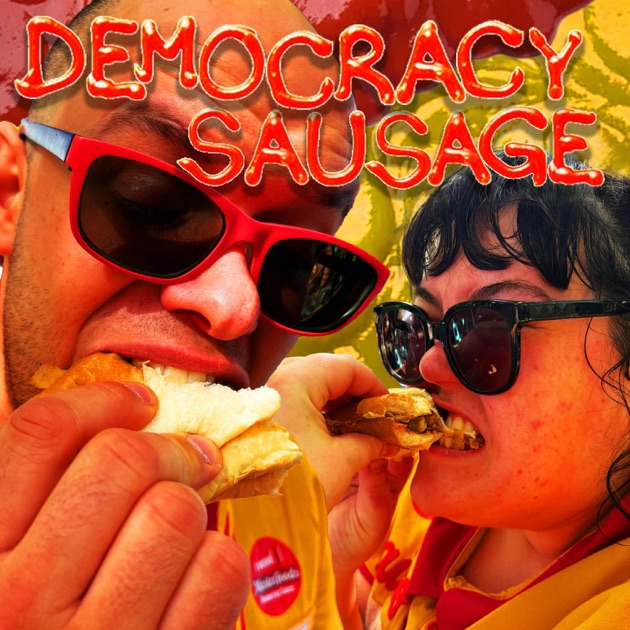

Australians have a tradition of getting a 'democracy sausage' on election day!